# Geoinformática - Práctica 2
## Geovisualización
#### Cartografía en Python con GeoPandas

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
import palettable as pltt
from seaborn import palplot

/home/datalab/miniconda3/envs/geoinf/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/datalab/miniconda3/envs/geoinf/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


En esta práctica, se aprenderá como importar, manipular y visualizar datos espaciales. Hasta cierto punto, los datos espaciales han sido tan propagados que existen casos en los que únicamente se consideran como "una columna más" dentro de una tabla; sin embargo, existen múltiples características que distinguen enormemente a los datos geográficos de las tablas numéricas comúnes.

En esta sesión, se pretende continuar avanzando sobre las habilidades desarolladas en la práctica de Transformación de Datos, para combinarlas y, en el proceso, descubrir que, salvo algunas particularidades, tratar con datos espaciales en Python se asemeja mucho al manejo de datos no espaciales.

Para esto, se utilizarán los datos derivados del *Censo de Población y Vivienda 2010* de INEGI, así como la geografía utilizada para su construcción, lo cual puede ser [consultado a través de este link](http://gaia.inegi.org.mx/scince2/viewer.html), y [descargado por este otro](https://www.inegi.org.mx/app/descarga/?ti=13&ag=00).

En primer lugar, como se hizo en la primera práctica, y por cuestiones de conveniencia, se definirá una variable de tipo `string` donde se almacene la ubicación de los datos de trabajo:

In [2]:
# Recuerda que podría ser diferente en tu caso, dependiendo de en dónde almacenes los datos
f = 'data/'

___
## Importando Datos Espaciales
La forma más fácil y rápida de importar datos espaciales es a través de un objeto del tipo `GeoDataFrame`, que tiene la capacidad de interpretar cuáles son las columnas donde se almacena la componente espacial, ausente en un `DataFrame` convencional; además, se puede visualizar rápidamente a través del comando `.plot()`.

La librería principal utilizada para el manejo de datos espaciales recibe el nombre de `geopandas`, la cual es una extensión geoespacial de la librería `pandas` con la que se ha trabajado hasta ahora. `geopandas` ofrece exactamente la misma funcionalidad de `pandas`, debido a que la primera fue construída a partir de la segunda, añadiendo un conjunto de funciones de caracter espacial que permiten que la manipulación y transformación de los datos espaciales sea tan sencilla como con los datos no espaciales.

En sólo dos líneas de código es posible obtener una representación gráfica de los datos espaciales contenidos en un archivo, siendo posible manejar una gran variedad de formatos; de hecho, debido a que ambos manejan el mismo tipo de drivers, la gran mayoría de los archivos vectoriales que son aceptados en `QGIS` pueden ser aceptados por `geopandas`. Se comenzará graficando una capa a la vez de forma tosca pero veloz, para poco a poco agregar estilo y sofisticación.

#### Polígonos
Comenzando por uno de los tipos de datos espaciales más comunes, Polígonos, se importará la geografía de todas las AGEB's que conforman la Ciudad de México, a través de la funcion `.read_file()` de `geopandas`; asimismo, se utilizará el método `.set_index()` para determinar su Clave Geográfica (CVEGEO) como el índice de cada fila:

In [3]:
agebs = gpd.read_file(f + 'agebs_cdmx.geojson')  # Importar los datos espaciales
agebs = agebs.set_index('ageb_urbana_cvegeo')    # Seleccionar su Clave Geográfica como el índice de las filas

La variable `agebs` contiene un objeto del tipo `GeoDataFrame`, el cual es muy similar a los `DataFrame` manejados en la práctica anterior, pero con una nueva columna llamada `geometry`:

In [4]:
agebs.head()

,geometry
ageb_urbana_cvegeo,
0900700013628,(POLYGON ((-99.03887376191602 19.3912779889989...
0900300011533,(POLYGON ((-99.18009578508389 19.3077165167440...
0901500010235,(POLYGON ((-99.14494638586424 19.4562541831128...
0900200010097,(POLYGON ((-99.20573230218446 19.5045424604436...
0900200011184,(POLYGON ((-99.20722847036538 19.5038667281062...


Como tal, es posible graficar rápidamente este `GeoDataFrame` a través de la instrucción `.plot()`:

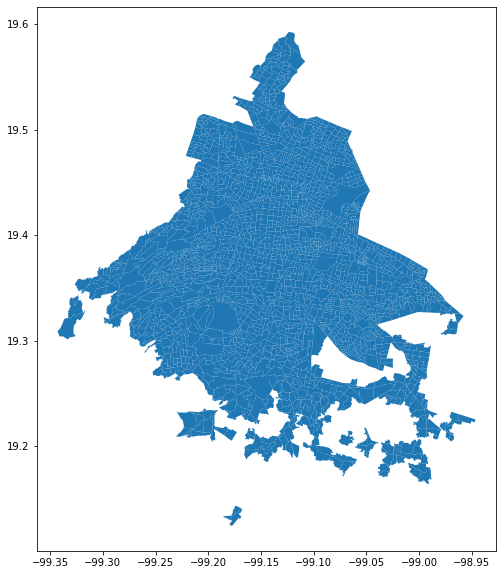

In [5]:
agebs.plot(figsize = (10,10))

Aunque no se trata de la visualización estética de las AGEB's, si permite visualizar rápidamente la apariencia de éstas; más adelante se aprenderá cómo mejorar la apariencia visual y personalizar estas representaciones.

**¡Importante** Si se utiliza la función `.loc()` aprendida en la práctica anterior para llamar una sola fila y su columna `geometry`, de forma automática se obtendrá una pequeña gráfica del shape en cuestión; debido a que el índice es la Clave Geográfica, éste puede ser utilizado para encontrar el AGEB deseado:

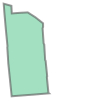

In [6]:
agebs.loc['0901200010337', 'geometry']

#### Líneas
Visualizar líneas es tan sencillo y directo como lo es con los polígonos. En este caso, se importarán todas las vialidades de la Alcaldía Cuauhtémoc:

In [7]:
vias = gpd.read_file(f + 'vias_cuauhtemoc.geojson') # Se importan los datos espaciales
vias = vias.set_index('id')                         # Se establece una columna como índice
vias.head()                                         # Visualizar los primeros registros de la fila

,geometry
id,
1,"LINESTRING (-99.1704148 19.4009206, -99.170470..."
2,"LINESTRING (-99.1784986 19.4071955, -99.178681..."
3,"LINESTRING (-99.1490507 19.4379558, -99.148707..."
4,"LINESTRING (-99.1473476 19.4453084, -99.147175..."
5,"LINESTRING (-99.17655379999999 19.4210494, -99..."


Al igual que con los polígonos, es posible utilizar la función `.plot()` para graficar las líneas rápidamente:

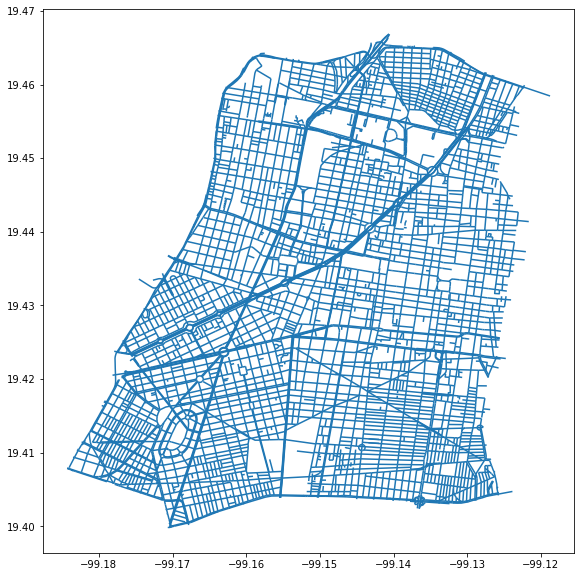

In [8]:
vias.plot(figsize = (10,10))

Y de igual forma, puede obtenerse una sola línea a través la función `.loc()`, su índice y la columna `geometry`:

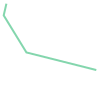

In [9]:
vias.loc[9079, 'geometry']

Al igual que con los polígonos, ésta no es la mejor visualización de las líneas, y probablemente se buscará cambiar algunos parámetros como colores, ancho, entre otros; sin embargo, es la forma más veloz en la que puede visualizarse la apariencia de los datos espaciales.

#### Puntos
Nuevamente, los puntos siguen una estructura similar; en este caso, se trabajarán con las Estaciones del Metro de la Ciudad de México:

In [10]:
estaciones = gpd.read_file(f + 'estaciones_metro.shp')
estaciones.head()

,stop_lat,stop_lon,geopoint,agency_id,stop_id,stop_desc,stop_name,trip_heads,geometry
0,19.443082,-99.139034,"(2:19.443082,-99.139034)",METRO,14169.0,Metro Línea 8 correspondencia con línea B.,Garibaldi_1,Garibaldi - Constitución de 1917,POINT (485405.8425224103 2149860.572109856)
1,19.468965,-99.136176,"(2:19.468965,-99.13617600000001)",METRO,14103.0,Metro Línea 5 correspondencia con línea 3.,La Raza_1_3,Pantitlán - Politécnico,POINT (485708.1095785024 2152724.377907486)
2,19.376256,-99.187746,"(2:19.37625563,-99.18774605)",METRO,14079.0,Metro Línea 7 correspondencia con línea 12.,Mixcoac_1,Tláhuac - Mixcoac,POINT (480284.5584925968 2142470.87422094)
3,19.408944,-99.122279,"(2:19.40894369,-99.12227869)",METRO,14144.0,Metro Línea 9 correspondencia con línea 4.,Jamaica,Tacubaya - Pantitlán,POINT (487161.9392610416 2146081.72623959)
4,19.375679,-99.186866,"(2:19.37567873,-99.18686628)",METRO,132131.0,Metro Línea 12 correspondencia con línea 7.,Mixcoac,Mixcoac - Tláhuac,POINT (480376.8753979359 2142406.938427646)


Y la visualización se produce de forma idéntica a los casos anteriores:

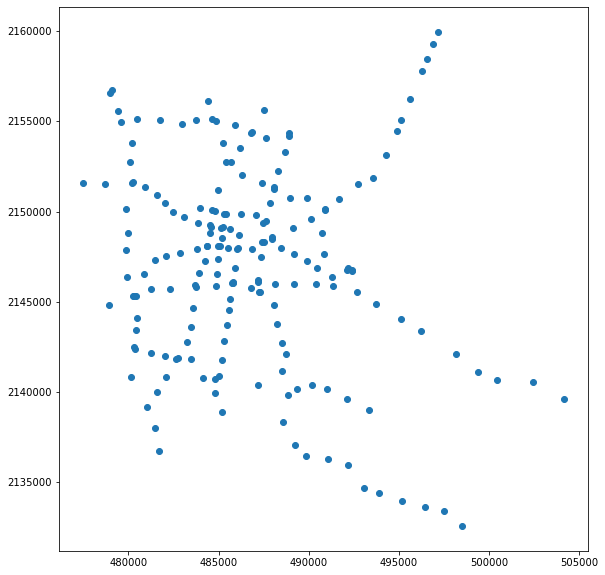

In [11]:
estaciones.plot(figsize = (10,10))

___
## Estilizando Gráficas
Es posible trabajar con múltiples características de una gráfica para personalizarla y que cumpla con necesidades específicas. En esta sección, se explorarán algunos de estos elementos básicos que permiten obtener mapas mejor representados y más fáciles de comprender.

#### Cambio de Transpariencia
La intensidad del color de un polígono puede ser cambiado sencillamente a través del argumento `alpha` de la función `.plot()`; éste se especifica a través de un valor entre cero y uno, donde el 0 representa transparencia completa y el 1 completa opacidad (máxima intensidad):

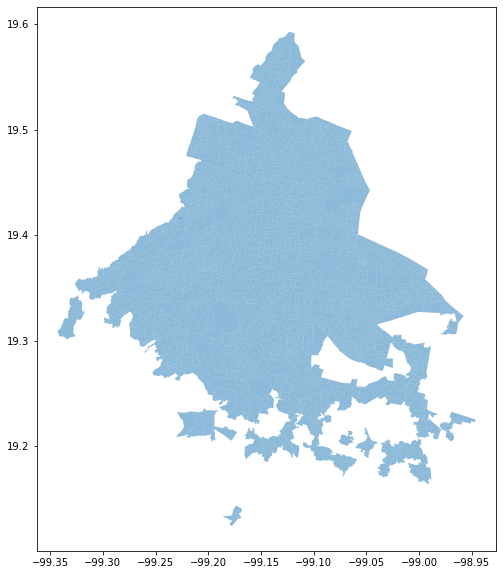

In [12]:
agebs.plot(alpha = 0.5 , figsize = (10,10))

#### Eliminar Ejes
En algunos casos, los ejes pueden ser de utilidad para entender el contexto de los datos, aunque en algunos otros los mapas se perciben mejor sin ellos. Elimiar los ejes implica envolver a la gráfica en una figura, lo cual conlleva utilizar más líneas de código que, por si mismas, permitirán crear diseños más flexibles y trabajados; éstas requieren el uso directo de la librería `matplotlib.pyplot`, que fue importada en esta práctica bajo el nombre `plt`:

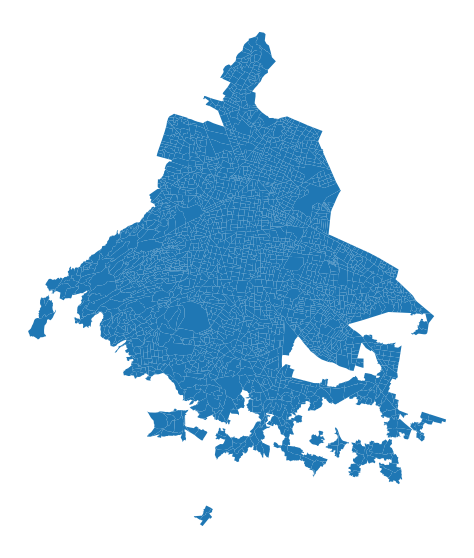

In [13]:
fig , fila = plt.subplots(1, figsize=(10,10))  # Preparación de la Figura y sus Ejes, así como el tamaño
agebs.plot(ax = fila)                          # Grafica la capa de polígonos sobre la fila
fila.set_axis_off()                            # Eliminar las ventanas de los ejes
plt.show()                                     # Mostrar el resultado

Analicemos a detalle cada una de las líneas anteriores:
1. Primero, se creó una figura bajo el nombre `fig` con una sola fila llamada `fila`, utilizando la función `.subplots()` proveniente de `matplotlib`. Este método genera dos elementos que pueden ser asignados a dos variables diferentes (`fig` y `fila`), lo cual se logra colocando sus nombres al inicio de la línea, separándolos por comas.
2. Después, se grafican las geografías de la misma forma que en los ejemplos anteriores, esta vez indicándole a la función que dibuje los polígonos en la fila que generamos anteriormente, a través del argumento `ax`.
3. En la tercera línea, se elimnan los ejes a través de la función `.set_axis_off()`
4. Por último, se grafica el resultado a través de `plt.show()`

#### Añadir un Título
Siguiendo la lógica del ejemplo anterior, el añadir un título implica únicamente utilizar una línea adicional, de modo que éste aparezca sobre la figura:

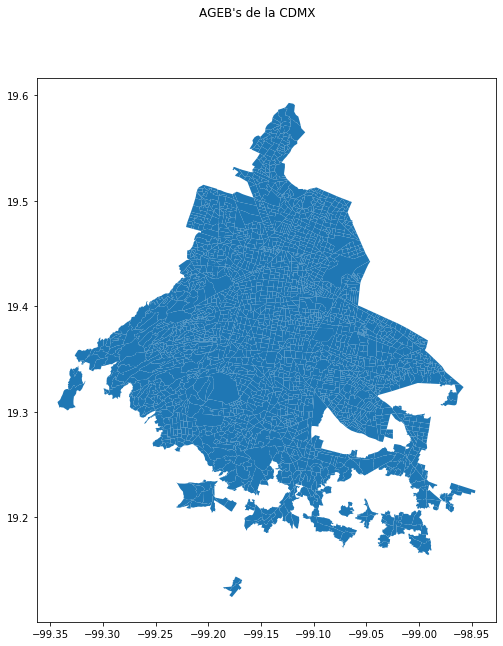

In [14]:
fig , fila = plt.subplots(1, figsize=(10,10))
agebs.plot(ax = fila)
fig.suptitle("AGEB's de la CDMX") # A través de la función '.suptitle()' aplicada a la figura se coloca el título.
plt.show()

#### Cambiar el Tamaño del Mapa
Al igual que con ejemplos anteriores, el argumento `figsize` sigue siendo utilizado para controlar el tamaño de la figura, radicando la diferencia en que el argumento se coloca dentro de la función `.subplots()`. Como se ha hecho hasta ahora, el primer número indica el ancho (Eje X), mientras que el segundo la altura (Eje Y), ambos medidos en pulgadas.

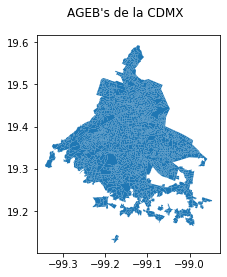

In [15]:
fig , fila = plt.subplots(1, figsize=(4,4))
agebs.plot(ax = fila)
fig.suptitle("AGEB's de la CDMX")
plt.show()

#### Modificar Bordes del Polígono
Los bordes de los polígonos pueden dificultar la interpretación de un mapa, por lo que resulta útil el saber cómo pueden ser modificados. Aunque no resulta muy complicado, la forma en la que `geopandas` accede a los bordes no es muy directa como con otras características del mapa, tales como su tamaño o el marco.

De modo que se entienda con facilidad los pasos a seguir, primero se mostrará el código que permite modificar los bordes de un polígono, para después analizarlo:

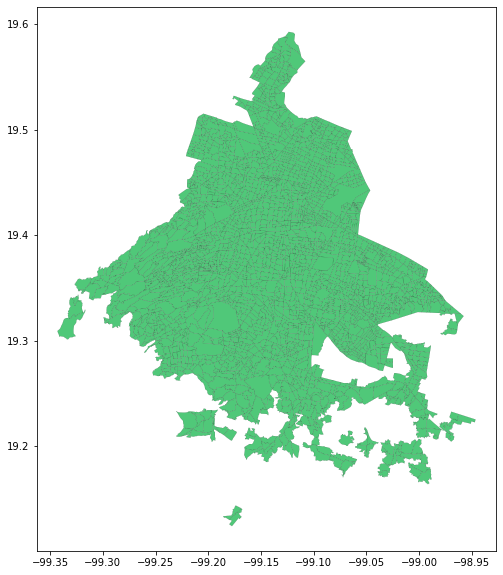

In [16]:
fig , fila = plt.subplots(1, figsize=(10,10))
# En la siguiente línea se modifica el color de los polígonos ('facecolor'), del borde ('edgecolor') y su ancho ('linewidth')
agebs.plot(linewidth = 0.1, facecolor = '#50C879', edgecolor='#000702',ax = fila)
plt.show()

Las líneas se trazaron con un color más oscuro, además de que los polígonos también modificaron su color. Analizando cada una de las líneas a detalle, puede observarse lo siguiente:
1. Al igual que con ejemplos anteriores, se crea una figura con una sola fila en su interior, a través de la función `.subplots()`, que será donde se graficará el mapa.
2. Después, se utiliza `.plot()` como se hace normalmente, pero utilizando tres argumentos nuevos: `linewidth`, que especifica el espesor de las líneas, `facecolor` que controla el color de cada uno de los polígonos, y `edgecolor`, que controla los colores de los bordes.
3. Por último, se traza el mapa utilizando `plt.show()`.

Este método funciona de forma muy similar con otras geometrías, como las líneas; por ejemplo, si se buscara mostrar las vialidades de la práctica de forma distinta, simplemente se modifican los argumentos correspondientes:

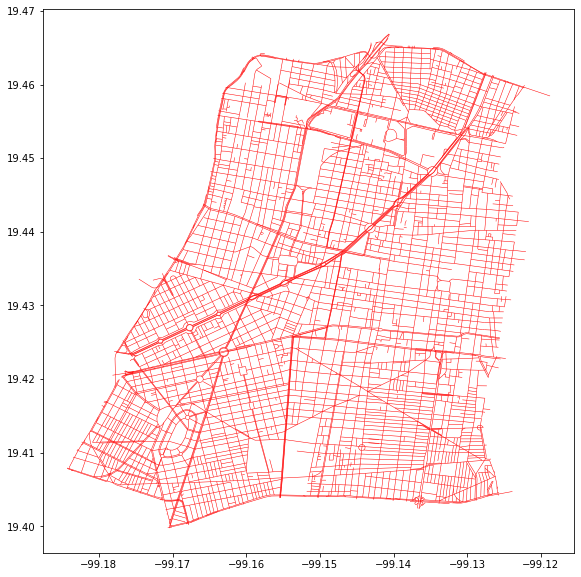

In [17]:
fig , fila = plt.subplots(1, figsize=(10,10))
vias.plot(linewidth = 0.5, color = 'red',ax = fila)
plt.show()

En este caso, dos argumentos ayudaron a personalizar la representación:
* `linewidth`, que permite modificar el espersor de todas las líneas del `GeoDataFrame`
* `color`, que modifica su color; cabe notar que, en este caso, al argumento se le colocó el nombre de un color, ya que Python inmediatamente lo interpreta como parte de su catálogo por defecto de colores; sin embargo, como se hizo en los polígonos, también se puede utilizar el código hexadecimal del color buscado.

Es importante destacar que, en el caso de las líneas, únicamente se necesitó modificar el argumento `color` de la función `.plot()` ya que, dado el hecho de que las líneas no poseen un área, no existe la necesidad de diferenciar entre el relleno (`facecolor`) y el contorno (`edgecolor`).

#### Transformar el Sistema de Coordenadas (CRS)
El Sistema de Coordenadas de Referencia (CRS, por sus siglas en inglés), es la forma en que los especialistas en la información espacial pueden representar un objeto tridimensional, como la forma semi-esférica de la Tierra, en un plano bidimensional, como un pedazo de papel o una pantalla.

Si los datos, desde su fuente, poseen información sobre el Sistema de Coordenadas, resulta bastante sencillo modificar éste en un `GeoDataFrame`. Primero, vale la pena verificar que los datos se encuentren proyectados:

In [18]:
agebs.crs

{'init': 'epsg:4326'}

Como puede observarse, la componente `.crs` de un `GeoDataFrame` es la que almacena la información sobre su proyección; en este caso, nos muestra que nuestros datos se encuentran en proyección WGS84, ya que ésta es la que posee el código EPSG 4326, y permite inferir que la unidad de medida son los grados (Latitud y Longitud).

Para reproyectar nuestros datos a un sistema diferente, se requiere conocer el código EPSG del nuevo sistema (el cual puede ser encontrado fácilmente en buscadores en línea [como éste](http://epsg.io/)) para después recurrir a la función `.to_crs()` de `geopandas`. En nuestro caso, se llevarán los datos a una proyección métrica, WGS84 / UTM Zona 14N (EPSG: 32614):

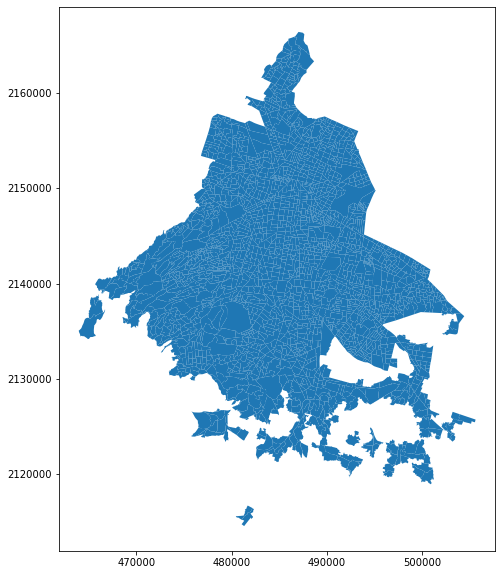

In [19]:
agebs.to_crs(epsg = 32614).plot(figsize = (10,10))

Debido a que el área de trabajo es relativamente pequeña, la forma de los polígonos observados es casi idéntica a la observada en los ejemplos anteriores; sin embargo, la escala utilizada para la gráfica es ahora diferente pues, cuando antes en el Eje Y se tenían valores de entre 19.2° y 19.8°, ahora se tienen de entre 2,120,000m y 2,160,000m, gracias al cambio del Sistema de Coordenadas.
___
#### Ejercicio Opcional
Genera un mapa de las AGEB's de la Ciudad de México que posea las siguientes características:
* Posea un título
* No muestre los ejes
* Posea un tamaño de 10in x 11in
* Todos los polígonos tengan un relleno del color "#525252" y sean completamente opacos
* Los bordes del polígono tengan un ancho de 0.3 y sean del color "#B9EBE3"
___
### Mapas con Múltiples Capas
Hasta ahora, se han estudiado muchas características relacionadas con graficar sólo una capa de información; sin embargo, en muchos casos, un mapa que busque ser lo más comunicativo y eficiente posible buscará combinar múltiples capas. Una de las características más importantes de los Sistemas de Información Geográfica es su capacidad para combinar información espacial proveniente de múltiples fuentes, y sobreponerlos entre sí, lo cual es completamente permitido en Python.

En esencia, combinar diferentes capas de información en un solo mapa implica añadir cada uno en la misma fila de una figura, de forma secuencial, como si se estuviesen solapando una sobre la otra. Por ejemplo, combinando las vialidades de la Alcaldía Cuauhtémoc con el polígono de ésta misma, se tendría:

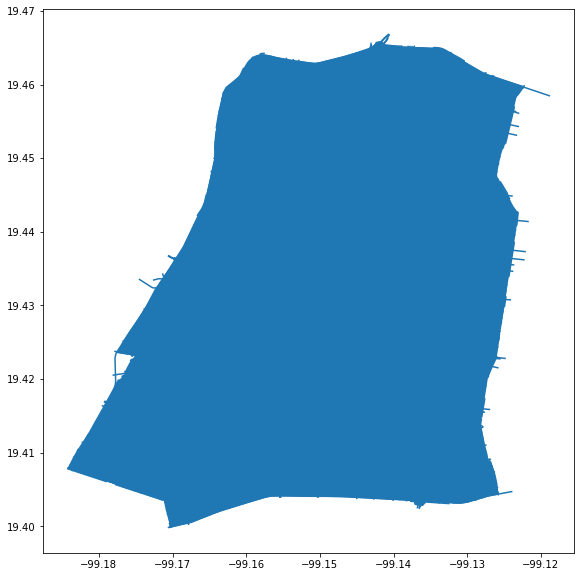

In [20]:
# Primero se necesita importar el polígono de la alcaldía, pues no se ha utilizado en ejemplos anteriores
cuauhtemoc = gpd.read_file(f + 'cuauhtemoc.geojson')
# Se establece la figura y su fila con '.subplots()'
fig , filas = plt.subplots(1, figsize = (10,10))
# Se añade primero el polígono base en la fila
cuauhtemoc.plot(ax = filas)
# Y después se colocan las vialidades en la misma fila
vias.plot(ax = filas)
# Por último, y como se ha hecho en ejemplos anteriores, el comando para mostrar el resultado
plt.show()

Debido a que los colores base no fueron diseñados para visualizar múltiples capas en un sólo mapa, resulta imposible diferenciar ambas; sin embargo, los trucos aprendidos durante el manejo de capas individuales resultan de utilidad en este caso, pues pueden ser aplicados de la misma forma:

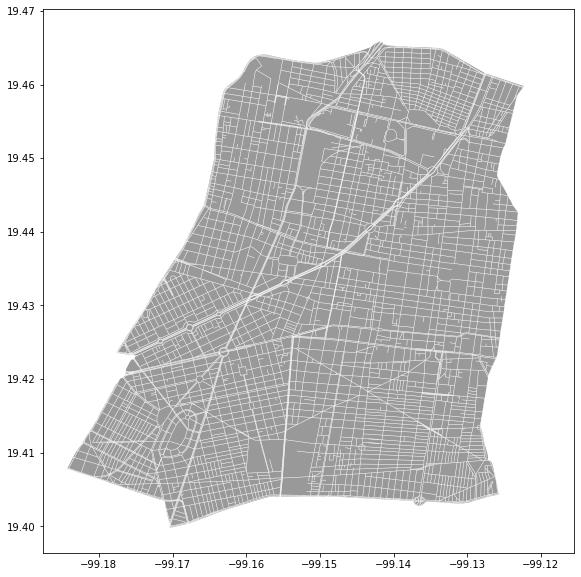

In [21]:
fig , filas = plt.subplots(1, figsize = (10,10))
# Para el polígono, se utilizan los argumentos aplicables al polígono
cuauhtemoc.plot(ax = filas, facecolor = 'grey', alpha = 0.8)
# Y pra las líneas, se utilizan los argumentos usados para las líneas
vias.plot(ax = filas, color = 'white', linewidth = 0.5)
plt.show()

___
## Paletas de Colores
La elección de colores en un mapa puede influir severamente en su apariencia y, a la larga, en su efectividad para comunicar. Aunque en algunos casos elegir estos colores a mano sea suficiente, en algunos otros donde el fin comunicativo se encuentre claramente definido, resulta útil recurrir a paletas de colores predefinidas.

Existen muchas fuentes a través de las cuales es posible obtener paletas de colores, en función del objetivo buscado con el mapa. Para el caso de Python, se tiene a la mano la librería [`palettable`](https://jiffyclub.github.io/palettable/) que posee múltiples paletas ya empaquetadas y listas para utilizar dentro del código; asímismo, resulta de utilidad la función `palplot()`, de la librería `seaborn`, para examinar los colores rápidamente.

En esta práctica, se utilizará un conjunto de paletas contenidas dentro de la librería `palettable` provenientes de las películas de Wes Anderson; específicamente, se utilizará una proveniente de la película *Viaje a Darjeeling*:

![Image](http://66.media.tumblr.com/2815b755b493555dd4a74fc9f7c84bdb/tumblr_nj7cclt9qb1tvvqeko1_500.jpg)

Primero, es necesario guardar esta paleta dentro de una variable; cabe recordar que `palettable` se importó bajo el nombre `pltt`:

In [22]:
paleta = pltt.wesanderson.Darjeeling2_5.hex_colors

Para visualizar la apariencia de esta paleta, se recurre a la función `palplot()` de `seaborn`:

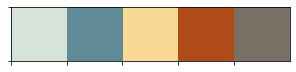

In [23]:
palplot(paleta)

Si se ve la variable por sí misma, podrá notarse que no se trata más que de una lista de colores bajo su Código Hexadecimal:

In [24]:
paleta

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

Esta paleta será la que le dará color a nuestro mapa. Como elemento adicional, se colocarán las colonias en las que se subdivide la alcaldía y en donde se han registrado 10 o más homicidios entre los años 2016 a 2018, por lo que primero es necesario importarlas:

In [25]:
agebs_cuau = gpd.read_file(f + 'agebs_cuauhtemoc.geojson')

Para esto, no se utilizará nada más que lo aprendido en secciones anteriores de la práctica, siendo la única diferencia que dentro de los argumentos de color correspondientes se colocará el Código Hexadecimal del color que se pretenda utilizar para esa capa:

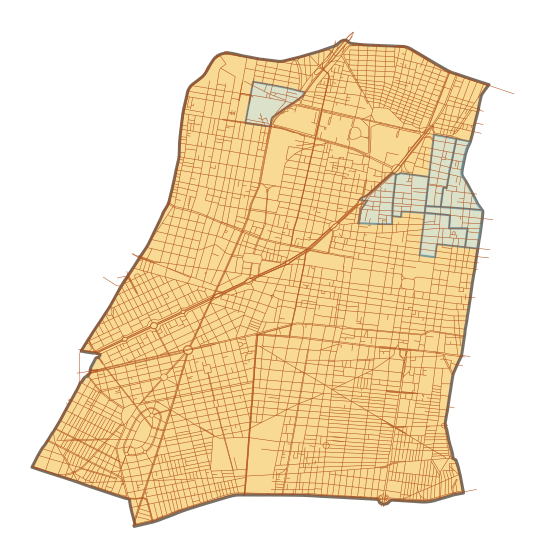

In [26]:
# Se define la figura con sus respectivas filas
fig , filas = plt.subplots(1, figsize = (10,10))
# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(ax = filas, facecolor = '#F9DA95', edgecolor= '#787064', linewidth = 3)
# Se añaden las vías
vias.plot(ax = filas, color = '#AE4B16', linewidth = 0.5)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(ax = filas, facecolor = '#D5E3D8', edgecolor = '#618A98', linewidth = 2, alpha = 0.8)
# Se remueve el marco con los ejes de la fila
filas.set_axis_off()
plt.show()

___
## Exportar Mapas
Una vez producido el mapa final, puede que se busque el exportar la imagen de modo que pueda ser colocada en un reporte, artículo, sitio web, etc. Para exportar mapas en Python, basta con sustituir la función `plt.show()` por `plt.savefig()` al final de las líneas de código para especificar el dónde y cómo guardarla. Por ejemplo, para guardar el mapa anterior en un archivo de tipo `.png` en la carpeta `data`, donde se encuentra toda la información con la que se ha trabajado hasta ahora, simplemente basta con:

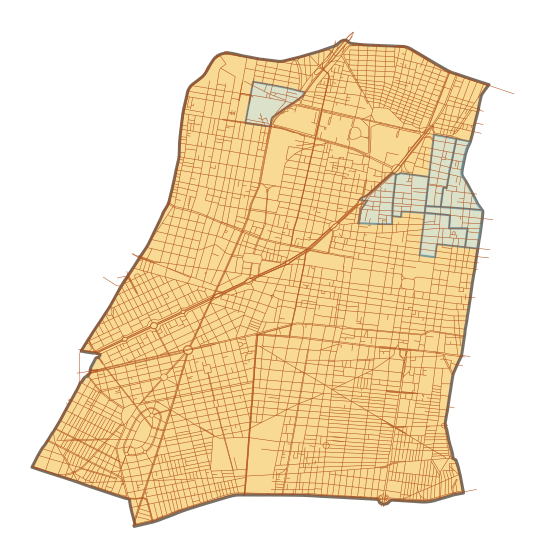

In [27]:
# Se define la figura con sus respectivas filas
fig , filas = plt.subplots(1, figsize = (10,10))
# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(ax = filas, facecolor = '#F9DA95', edgecolor= '#787064', linewidth = 3)
# Se añaden las vías
vias.plot(ax = filas, color = '#AE4B16', linewidth = 0.5)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(ax = filas, facecolor = '#D5E3D8', edgecolor = '#618A98', linewidth = 2, alpha = 0.8)
# Se remueve el marco con los ejes de la fila
filas.set_axis_off()

# Se guarda el mapa como un archivo PNG en la carpeta 'data/'
plt.savefig('data/mapa_final.png')

Si se revisa la carpeta, se encontrará la imagen `.png` con el mapa.

La función `plt.savefig()`, de la librería `matplotlib.pyplot` contiene un gran número de parámetros y opciones para trabajar. Dado que el tamaño del mapa generado no es muy grande, es posible incrementar la calidad de éste a través del argumento `dpi`, o *Puntos Por Pulgada* (dpi), el cual es una medida estándar de la resolución de las imágenes. Por ejemplo, para obtener una imagen de Alta Definición (HD), se puede cambiar el argumento a 1,080:

**Importante** - Si el proceso tarda demasiado, cambiar el argumento por 500 también funciona, pues también arrojará una imagen de buena calidad y más fácil de generar.

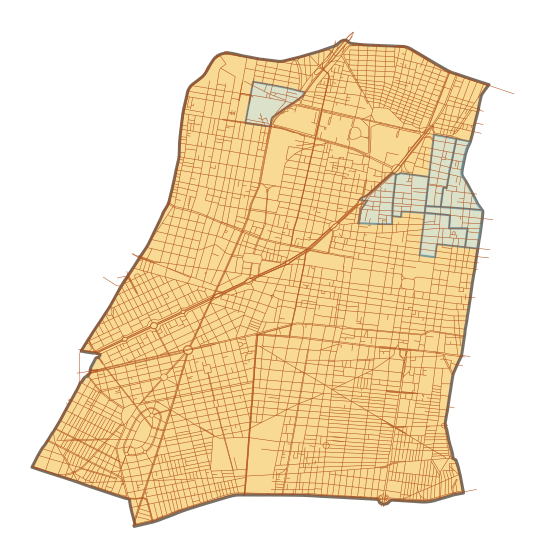

In [28]:
# Se define la figura con sus respectivas filas
fig , filas = plt.subplots(1, figsize = (10,10))
# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(ax = filas, facecolor = '#F9DA95', edgecolor= '#787064', linewidth = 3)
# Se añaden las vías
vias.plot(ax = filas, color = '#AE4B16', linewidth = 0.5)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(ax = filas, facecolor = '#D5E3D8', edgecolor = '#618A98', linewidth = 2, alpha = 0.8)
# Se remueve el marco con los ejes de la fila
filas.set_axis_off()

# Se guarda el mapa como un archivo PNG en la carpeta 'data/'
plt.savefig('data/mapa_final.png', dpi = 1080)

___
## Manipulación de Datos Espaciales (`GeoDataFrames`)
Una vez teniendo el conocimiento de cómo visualizar la información espacial, es posible estudiar cómo puede ser combinada con las operaciones aprendidas en sesiones pasadas sobre la manipulación de datos tabulares no espaciales. En esencia, la clave es entender que un `GeoDataFrame` contiene la mayoría de su información espacial en una sola columna llamada `geometry`, teniendo el resto de la tabla la misma apariencia y comportamiento que un `DataFrame` no espacial, lo que les concede toda la flexibilidad y conveniencia estudiada en la manipulación, segmentación y transformación de datos tabulares; además de ello, la naturaleza de un `GeoDataFrame` también incorpora un conjunto de operaciones explícitamente espaciales para combinar y transformar los datos. En esta sección, ambos tipos de operaciones serán consideradas.

Primero, vale la pena repasar algunas de las técnicas aprendidas en sesiones pasadas sobre datos no espaciales, y entender cómo pueden ser combinados con el mapeo de sus contrapartes espaciales. Para esto, se utilizarán los datos de población abordados anteriormente:

In [29]:
import pandas as pd

# Importar la tabla
poblacion = pd.read_csv(f + 'poblacion_cdmx.csv' , index_col = 'ageb_urbana_cvegeo')

# Visualizar la tabla
poblacion.head()

,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas
ageb_urbana_cvegeo,,,,,,,,,,
0900200010010,71,77,235,129,137,298,182,1055,293,822
0900200010025,206,241,466,212,261,622,426,1705,699,974
090020001003A,157,137,347,202,197,478,273,1395,370,902
0900200010044,148,162,391,178,203,459,365,1422,469,993
0900200010097,56,82,150,80,88,202,157,626,248,523


### Unión de Tablas
En la práctica se han importado dos tablas importantes: por una parte, toda la información espacial está contenida en la tabla `agebs`, mientras que los datos tabulares se encuentran contenidos en `poblacion`. Para trabajar con ambos, es necesario *conectar* las tablas; en idioma de `pandas`, esto recibe el nombre de `join` (*Unión*), siendo los elementos claves para la unión los *índices* de cada tabla, esto es, los nombres asignados a cada fila; esto es lo que se determina utilizando el argumento `index_col` al momento de importar un `.csv`.

Tanto en el caso de `agebs` como de `poblacion`, el índice corresponde a la Clave Geográfica (CVEGEO) de cada una de las AGEB's, lo cual permite ejecutar el `join` de la siguiente manera:

In [30]:
ageb_pob = agebs.join(poblacion , on = 'ageb_urbana_cvegeo')
ageb_pob.head()

,geometry,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas
ageb_urbana_cvegeo,,,,,,,,,,,
0900700013628,(POLYGON ((-99.03887376191602 19.3912779889989...,40,45,104,48,49,126,96,345,144,133
0900300011533,(POLYGON ((-99.18009578508389 19.3077165167440...,0,0,0,0,0,0,0,0,0,0
0901500010235,(POLYGON ((-99.14494638586424 19.4562541831128...,29,37,87,57,47,152,111,396,178,229
0900200010097,(POLYGON ((-99.20573230218446 19.5045424604436...,56,82,150,80,88,202,157,626,248,523
0900200011184,(POLYGON ((-99.20722847036538 19.5038667281062...,38,54,84,50,65,144,112,416,187,239


Analizando un poco la lógica detrás de la operación `.join()`:
* En primer lugar, se trata de una operación en la que se está "anexando" un conjunto de datos a uno ya existente. En este caso en particular, se anexan los datos de población contenidos en la tabla `poblacion` a la tabla espacial `agebs`.
* La tabla que se está anexando (`población`) necesita tener sus índices bien definidos para que la operación pueda proceder correctamente. En este caso, los índices fueron asignados desde la importación de la tabla, por lo que se trata de un requerimiento ya cumplido.
* La función `.join()` posee dos argumentos: el primero, referente a la tabla que se está anexando; el segundo, determinado por `on`, determina el nombre de la columna o del índice de la tabla principal que servirá como referencia para la unión.

### Manipulaciones No Espaciales
Una vez unidos los datos espaciales con los no espaciales, pueden utilizarse las técnicas aprendidas en la manipulación y segmentación de tablas no espaciales para crear mapas más complejos. En particular, se utilizarán las funciones requeridas para seleccionar filas basándose en las características de su población, añadiendo la posibilidad de visualizarlas en un mapa.

En primer lugar, puede generarse nuevamente la columna que contiene la Población Total de cada AGEB replicando los comandos ya aprendidos:

In [31]:
ageb_pob['pob_total'] = poblacion.sum(axis = 1)
ageb_pob.head()

,geometry,pob_0a2,pob_3a5,pob_6a11,pob_12a14,pob_15a17,pob_18a24,pob_25a29,pob_30a49,pob_50a59,pob_60ymas,pob_total
ageb_urbana_cvegeo,,,,,,,,,,,,
0900700013628,(POLYGON ((-99.03887376191602 19.3912779889989...,40,45,104,48,49,126,96,345,144,133,1130
0900300011533,(POLYGON ((-99.18009578508389 19.3077165167440...,0,0,0,0,0,0,0,0,0,0,0
0901500010235,(POLYGON ((-99.14494638586424 19.4562541831128...,29,37,87,57,47,152,111,396,178,229,1323
0900200010097,(POLYGON ((-99.20573230218446 19.5045424604436...,56,82,150,80,88,202,157,626,248,523,2212
0900200011184,(POLYGON ((-99.20722847036538 19.5038667281062...,38,54,84,50,65,144,112,416,187,239,1389


Posteriormente, se seleccionan las 10 AGEB's con la mayor cantidad de población, a través de la función `.sort_values()` y añadiendo el valor de la selección deseado a `.head()`:

In [32]:
agebs_mas_pobladas = ageb_pob.sort_values('pob_total', ascending = False).head(10)

Ahora, puede crearse un mapa de la Ciuda de México y sobreponer como una nueva capa estas áreas:

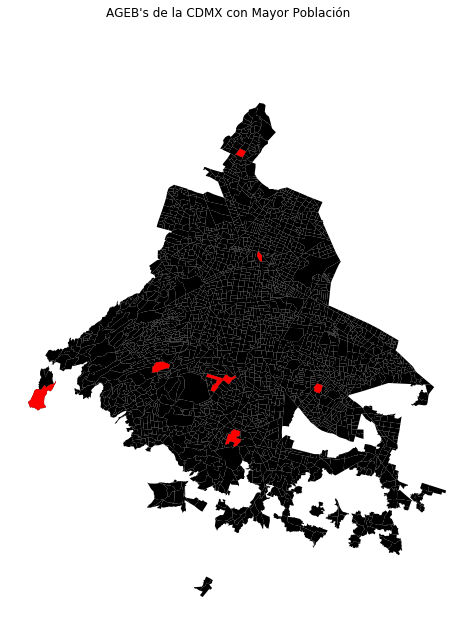

In [33]:
fig, fila = plt.subplots(1, figsize=(10, 10))
ageb_pob.plot(facecolor='black', linewidth=0.025, ax=fila)              # Capa Base de AGEB's
agebs_mas_pobladas.plot(alpha=1, facecolor='red', linewidth=0, ax=fila) # Capa AGEB's más pobladas
fila.set_axis_off()
fig.suptitle("AGEB's de la CDMX con Mayor Población")
plt.show()

### Manipulaciones Espaciales
Además de las operaciones basadas únicamente en valores, como las realizadas anteriormente, es posible realizar sobre un `GeoDataFrame` una gran variedad de operaciones encontradas en los SIG. A continuación se detallarán algunas de las más comunes

#### Cálculo de Centroides
En algunos casos, resulta útil simplificar un polígono en un sólo punto y, para ello, se calculan los Centroides (siendo algo como el análogo espacial de la media estadística). El siguiente comando dará como resultado un objeto del tipo `GeoSeries` (una sola columna con datos espaciales) con los Centroides de los polígonos contenidos en un `GeoDataFrame`:

In [34]:
centroides = ageb_pob.centroid
centroides.head()

ageb_urbana_cvegeo
0900700013628    POINT (-99.03839044903381 19.39065894704702)
0900300011533    POINT (-99.17800550775064 19.30761388146169)
0901500010235    POINT (-99.14579062983663 19.45542305273751)
0900200010097    POINT (-99.20697308011717 19.50685342003142)
0900200011184    POINT (-99.20607851685526 19.50238839427931)
dtype: object

Es importante destacar que `centroides` no es una tabla completa, sino una sola columna, esto es, un objeto del tipo `GeoSeries`; esto brinda la posibilidad de graficarlo de forma similar a como se ha hecho anteriormente:

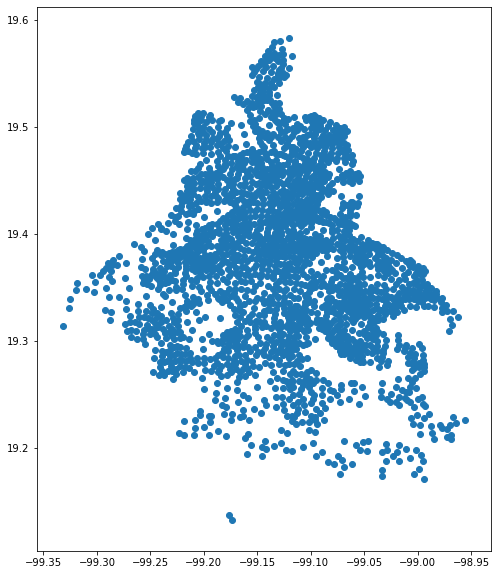

In [35]:
centroides.plot(figsize = (10,10))

En el caso de un objeto del tipo `GeoSeries`, ya no es necesario hacer referencia a la columna `geometry` para inspeccionar su contenido, ya que, al tratarse de una columna de datos espaciales, el objetivo es en sí la geometría.

#### Point-In-Polygon (PiP)
El saber si un punto se encuentra dentro de un polígono es un ejercicio simple desde el punto de vista conceptual; sin embargo, al momento de trasladarlo a la programación, puede tratarse de una acción difícil de completar. La forma más sencilla de realizar esto en `GeoPandas` es a través del método `.contains()`, disponible para todo polígono.

In [36]:
poligono = ageb_pob['geometry'][0]  # Se aisla el primer polígono dela tabla
punto1 = centroides[0]              # Se aisla el primer punto de la serie
punto2 = centroides[1]              # Se aisla el segundo punto de la serie

In [37]:
poligono.contains(punto1)

True

In [38]:
poligono.contains(punto2)

False

El método anterior permite realizar una verificación rápida y cualitativa de si un punto se encuentra dentro de un polígono; sin embargo, en muchos otros casos esto no resulta ser muy eficiente, por lo que se recurre a una operación conocida como *Spatial Join*; éstos serán estudiados más a fondo en futuras prácticas.

#### Buffers
Los Buffers son parte de las operaciones clásicas de un SIG, y consisten en trazar un área alrededor de una geometría en particular, dado un radio específico. Éstos resultan bastate útiles al momento de combinarlos, por ejemplo, con operaciones de *Point-In-Polygon* para calcular valores de accesibilidad, áreas de influencia, entre otros.

Para crear un Buffer a través de `GeoPandas`, puede utilizarse el método `.buffer()`, al cual se le coloca como argumento el radio deseado. Es importante tomar en cuenta que el radio especificado necesita encontrarse en las mismas unidades que el Sistema de Coordenadas de Referencia (CRS) de la geometría con la que se esté trabajando. Por ejemplo, revisando la capa importada anteriormente de Estaciones del Metro:

In [39]:
estaciones.crs

{'init': 'epsg:32614'}

La propiedad `crs` indica que se trata de la proyección con Código EPSG 32614, de la cual, [al investigar sobre ella](http://epsg.io/32614), se tiene que se trata de una proyección que trabaja en metros. Como tal, si se buscara generar un Buffer de 500m alrededor de cada estación, simplemente se tendría que:

In [40]:
buff = estaciones.buffer(500)
buff.head()

0    POLYGON ((485905.8425224103 2149860.572109856,...
1    POLYGON ((486208.1095785024 2152724.377907486,...
2    POLYGON ((480784.5584925968 2142470.87422094, ...
3    POLYGON ((487661.9392610416 2146081.72623959, ...
4    POLYGON ((480876.8753979359 2142406.938427646,...
dtype: object

Para representar éstos en un mapa, se recurre a los métodos estudiados anteriormente:

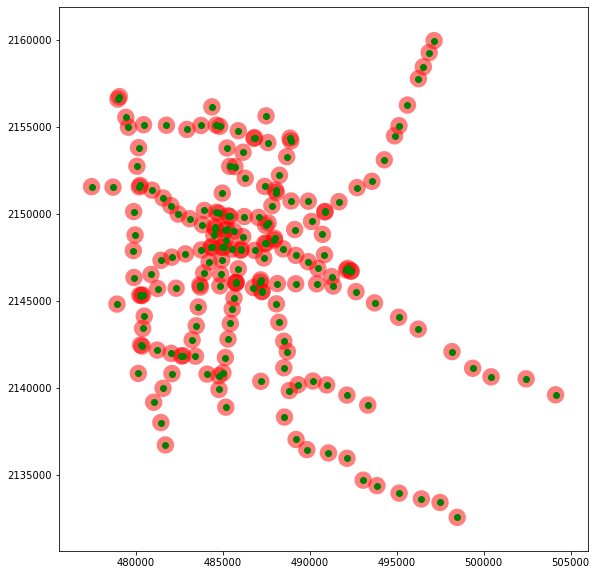

In [41]:
fig, fila = plt.subplots(1, figsize=(10, 10))

# Graficar los Buffers
buff.plot(ax = fila , alpha = 0.5 , facecolor = 'red', linewidth = 0)

# Graficar las Estaciones de Metro sobre las referencias
estaciones.plot(ax = fila , color = 'green')
plt.show()

#### Ejercicio Opcional
Genera un mapa de la Ciudad de México donde los polígonos de las AGEB's sean de color negro, y sobre ellos y de color amarillo los Buffers a 250m de cada uno de sus centroides.